1) Display the number of instances for each class. That is, you should write code to find out how many instances you have for class 1, class 2, class 3, and class 4. (No loops)

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset
dataset = pd.read_csv('assign3data.csv')

X = dataset.iloc[:,:11].values  
y = dataset.iloc[:,11].values

dataset['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

2) Perform one hot encoding on Column 1 (i.e. region) and drop the extra dummy variable.

In [182]:
#Dealing with categorical variables
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
col_trans = make_column_transformer((OneHotEncoder(), [0]), remainder='passthrough')
X = col_trans.fit_transform(X)

#Removing the extra dummy variable (column 1)
X = np.delete(X,0,1)


3) Create histograms of columns age and income to visually explore their distributions.

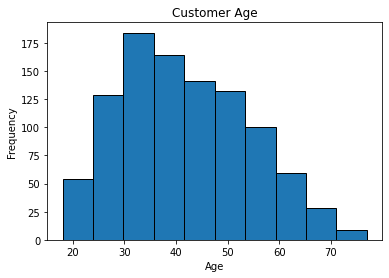

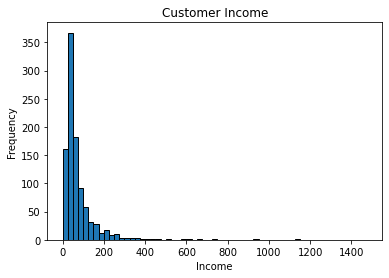

In [183]:
plt.hist(X[:, [3]], edgecolor='black')
plt.title('Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# There is a right skew to the Customer Income with some significant
# outliers. I used relatively small bins in order to be able to view
# the distribution of the dense area and also where the outliers are.

plt.hist(X[:,[6]], bins=(np.arange(0,1500,25)),edgecolor='black')
plt.title('Customer Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

4) Split the dataset into training (70%) and testing set (30%). Perform normalization of the data using standardization.

In [184]:
#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

#Normalizing the features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

5) Model 1: Fit a logistic regression model. What is the testing misclassification rate you get?

In [185]:
#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression
logClassifierObj = LogisticRegression(random_state=0)
logClassifierObj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred = logClassifierObj.predict(X_test)

#Finding Misclassification Rate
misclass = 1 - (logClassifierObj.score(X_test, y_test))
print('Logistic Regression Model:\nMisclassification Rate: ', misclass)

Logistic Regression Model:
Misclassification Rate:  0.5966666666666667


6) Model 2: We will now fit k-NN. However for k-NN you need to specify the value for k. In order to figure that out, run k-NN in a loop with different values of k (starting from k=5) and compute the testing misclassification rate. Plot a chart with k on X-axis and testing error on the Y-axis. What is the lowest value of testing error and corresponding value of k?

k-NN Model:
Minimum misclassification rate:  0.6233333333333333
Where K = 31


KNeighborsClassifier(n_neighbors=31)

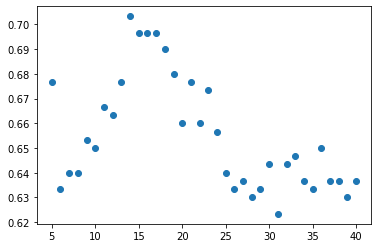

In [186]:
#Instantiating lists and i for the loop
i = 5
misclass = []
k_list = []

#Loop to find lowest misclass rate and corresponding value of k for k-NN Model
while i <= 40:
    from sklearn.neighbors import KNeighborsClassifier
    knnClassifierObj = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski')
    knnClassifierObj.fit(X_train, y_train)
    m = 1 - (knnClassifierObj.score(X_test,y_test))
    misclass.append(m)
    k_list.append(i)
    i += 1
    
plt.scatter(k_list,misclass)
k = (misclass.index(min(misclass))) + 5
print("k-NN Model:\nMinimum misclassification rate: ", min(misclass))
print("Where K =", k)

#Storing the k-NN model with the lowest misclassification rate into knnClassifierObj
knnClassifierObj = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
knnClassifierObj.fit(X_train, y_train)

7) Model 3: Fit SVM model with different kernels. Which kernel gives the least testing error?

In [187]:
# Linear SVM
from sklearn.svm import SVC
linClassifierObj = SVC(kernel='linear')
linClassifierObj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred_lin = linClassifierObj.predict(X_test)

#Model Accuracy
print('Linear SVM Model:\nMisclassification Rate: ', (1 - (linClassifierObj.score(X_test,y_test))))

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_lin)
print(cm,'\n')


# Kernel SVM
from sklearn.svm import SVC
kernClassifierObj = SVC(kernel = 'rbf')
kernClassifierObj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred_kern = kernClassifierObj.predict(X_test)

#Model Accuracy
print('Kernel SVM Model:\nMisclassification Rate: ', (1 - (kernClassifierObj.score(X_test,y_test))))

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_kern)
print(cm,'\n')


# Sigmoid SVM
from sklearn.svm import SVC
sigClassifierObj = SVC(kernel='sigmoid')
sigClassifierObj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred_sig = sigClassifierObj.predict(X_test)

#Model Accuracy
print('Sigmoid SVM Model:\nMisclassification Rate: ', (1 - (sigClassifierObj.score(X_test,y_test))))

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_sig)
print(cm)

print('\nThe linear SVM model has the lowest testing error.')

Linear SVM Model:
Misclassification Rate:  0.5966666666666667
[[47  9 28 11]
 [ 9 16 21 17]
 [24 16 34  7]
 [11 18  8 24]] 

Kernel SVM Model:
Misclassification Rate:  0.64
[[43  7 34 11]
 [ 9 18 19 17]
 [24 16 28 13]
 [ 9 19 14 19]] 

Sigmoid SVM Model:
Misclassification Rate:  0.6066666666666667
[[44  8 30 13]
 [13 16 17 17]
 [23 17 32  9]
 [ 9 15 11 26]]

The linear SVM model has the lowest testing error.


8) Model 4: Fit Naïve Bayes model. What is the testing error you get?

In [188]:
#Naïve Bayes
from sklearn.naive_bayes import GaussianNB
nbClassifierObj = GaussianNB()
nbClassifierObj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred = nbClassifierObj.predict(X_test)

#Model Accuracy
print('Naïve Bayes Model:\nMisclassification Rate: ', (1 - (nbClassifierObj.score(X_test,y_test))))

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Naïve Bayes Model:
Misclassification Rate:  0.6133333333333333
[[73  7 15  0]
 [39 10 10  4]
 [42 13 23  3]
 [30 16  5 10]]


9) Model 5: Fit Random Forest model. For Random Forest, you need to specify the number of trees (n_estimators). In order to figure that out, run Random Forest in a loop with different values of n_estimators (starting from 10) and compute the testing misclassification rate. Plot a chart with n_estimators on X-axis and testing error on the Y-axis. What is the lowest value of testing error and corresponding value of n_estimators?

Random Forest Model:
Minimum misclassification rate:  0.63
Where n_estimators = 120


RandomForestClassifier(criterion='entropy', n_estimators=120)

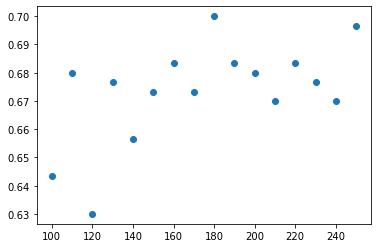

In [192]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Instantiating lists and i for the loop
i = 100
misclass = []
n_estimator = []

while i <= 250:
    rfClassifierObj = RandomForestClassifier(criterion='entropy', n_estimators=i)
    rfClassifierObj.fit(X_train,y_train)
    m = 1 - (rfClassifierObj.score(X_test,y_test))
    misclass.append(m)
    n_estimator.append(i)
    i += 10

plt.scatter(n_estimator, misclass)
n = ((10 *(misclass.index(min(misclass)))) + 100)

print("Random Forest Model:\nMinimum misclassification rate: ", min(misclass))
print("Where n_estimators =", n)

#Storing the Random Forest Model with lowest n_estimators into rfClassifierObj
rfClassifierObj = RandomForestClassifier(criterion='entropy', n_estimators=n)
rfClassifierObj.fit(X_train,y_train)

10) Predicting with Ensemble: Now that you have built 5 models. Loop over the testing set. For every test instance, have each of the models predict the class label. Eventual class predicted will be based on a majority vote of the 5 models. What is the testing misclassification rate you get with the ensemble model?

In [195]:
#Instantiating 2-d array and i for the loop
i = 0
y_pred_arr = np.zeros((len(X_test),5))

#Loop to retrieve classification of the 5 models for each row of X_test
#Resulting array stored into 2d array y_pred_arr
while i < len(X_test):    
    y_pred_log = logClassifierObj.predict(X_test[[i],:])
    y_pred_knn = knnClassifierObj.predict(X_test[[i],:])
    y_pred_lin = linClassifierObj.predict(X_test[[i],:])
    y_pred_nb = nbClassifierObj.predict(X_test[[i],:])
    y_pred_rf = rfClassifierObj.predict(X_test[[i],:])
    
    y_pred_arr[i] = np.array([[y_pred_log[0],y_pred_knn[0],y_pred_lin[0],y_pred_nb[0],y_pred_rf[0]]])

    i += 1

    
#Finding mode of each row and creating 1-d array, y_pred
from scipy import stats
m_info = stats.mode(y_pred_arr, axis=1)
m = m_info[0]
y_pred_ensemble = m.flatten()

#Finding Misclassification Rate of Ensemble Model
from sklearn.metrics import accuracy_score
misclass_ensemble = 1 - (accuracy_score(y_test, y_pred_ensemble))
print('Ensemble Model:\nMisclassification Rate: ', misclass_ensemble)

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_ensemble)
print(cm)

Ensemble Model:
Misclassification Rate:  0.5966666666666667
[[55  7 25  8]
 [12 16 20 15]
 [25 16 33  7]
 [15 22  7 17]]
